<a href="https://colab.research.google.com/github/michaeldavis1675-max/Defense_Data_Analysis_Jobs_Project/blob/main/Final_Draft_Python_Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Solving the problem of which kind of family vehicle to buy:
Most people want to buy a fuel-efficient and family-friendly vehicle. This generally boils down to one of two choices: the minivan, or the SUV? In some cases, people want a "daily driver" to get them to work efficiently, which usually means a compact or subcompact car. This dataset produced by the Department of Transportation has pertinent data on most vehicles manufactured since 1984. It features information related to vehicle manufacturers, types (classes) of vehicles, city mileage, highway mileage, and much more.

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import builtins

df = pd.read_csv('vehicles.csv')

pd.set_option('display.max_rows', None)

#rename columns
df = df.rename(columns={'city08': 'city_MPG', 'highway08': 'highway_MPG'})

/tmp/ipython-input-2362816518.py:7: DtypeWarning: Columns (69,71,72,73,74,75,77,80) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('vehicles.csv')


In [5]:
#Get list of column names from df
# df.columns

In [6]:
#Separate out a dataframe where all the unique car makes are listed
makes_df = pd.DataFrame(df['make'].unique())

In [7]:
#Create a dataframe where the common American and Asian makes are represented
specific_makes = ['Dodge', 'Chrysler', 'Plymouth', 'Jeep', 'Ram', 'Eagle', 'General Motors', 'Buick', 'Cadillac', 'Chevrolet', 'Oldsmobile', 'Pontiac', 'GMC', 'Geo', 'Ford', 'Mercury', 'Mazda', 'Lincoln', 'Shelby', 'Toyota', 'Lexus', 'Scion', 'Subaru', 'Honda', 'Mitsubishi', 'Isuzu', 'Suzuki', 'Acura', 'Volkswagen']
common_makes = df[df['make'].isin(specific_makes)]

Data Cleaning note:
Eliminating all but the commonly sold makes of cars took the data from 49,582 rows (in df) to 31,630 rows (in common_makes); a reduction of 17,952 rows. This also eliminates the vast majority of the null values.

In [8]:
#Extract columns of interest into new dataframe for analysis on efficiency etc.
efficiency_data = pd.DataFrame(common_makes[['year', 'make', 'model', 'id', 'VClass', 'engId', 'eng_dscr', 'cylinders', 'displ', 'trans_dscr', 'trany', 'drive', 'baseModel', 'fuelType', 'fuelType1', 'guzzler', 'mpgData', 'feScore', 'range', 'rangeCity', 'rangeCityA', 'rangeHwy', 'rangeHwyA', 'city_MPG', 'highway_MPG', 'highway08U', 'highwayA08', 'highwayA08U', 'co2TailpipeGpm', 'comb08', 'comb08U', 'combA08', 'combA08U', 'combE', 'co2', 'co2A', 'co2TailpipeAGpm', 'ghgScore', 'ghgScoreA', 'phevBlended', 'youSaveSpend']])

In [9]:
#Add a column to indicate what group a manufacturer belongs to and fill in those fields
efficiency_data['manufacturer_group'] = None
efficiency_data.loc[efficiency_data['make'].isin(['Dodge', 'Chrysler', 'Plymouth', 'Eagle', 'Jeep', 'Ram']), 'manufacturer_group'] = 'MOPAR'
efficiency_data.loc[efficiency_data['make'].isin(['Buick', 'Cadillac', 'Chevrolet', 'Pontiac', 'Oldsmobile', 'GMC', 'Geo', 'General Motors']), 'manufacturer_group'] = 'GM'
efficiency_data.loc[efficiency_data['make'].isin(['Ford', 'Mercury', 'Mazda', 'Lincoln', 'Shelby']), 'manufacturer_group'] = 'Ford'
efficiency_data.loc[efficiency_data['make'].isin(['Toyota', 'Lexus', 'Scion']), 'manufacturer_group'] = 'Toyota'
efficiency_data['manufacturer_group'].fillna('other', inplace=True)

/tmp/ipython-input-4200057211.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  efficiency_data['manufacturer_group'].fillna('other', inplace=True)


In [10]:
#Add a column to indicate what class of vehicle is indicated
efficiency_data['vehicle_class'] = None
efficiency_data.loc[efficiency_data['VClass'].str.contains('Compact Cars', case=False, na=False), 'vehicle_class'] = 'Compact'
efficiency_data.loc[efficiency_data['VClass'].str.contains('Large Cars', case=False, na=False), 'vehicle_class'] = 'Sedan'
efficiency_data.loc[efficiency_data['VClass'].str.contains('Midsize Cars', case=False, na=False), 'vehicle_class'] = 'Mid-Size Sedan'
efficiency_data.loc[efficiency_data['VClass'].str.contains('Station Wagons', case=False, na=False), 'vehicle_class'] = 'Wagon'
efficiency_data.loc[efficiency_data['VClass'].str.contains('Minicompact Cars', case=False, na=False), 'vehicle_class'] = 'Compact'
efficiency_data.loc[efficiency_data['VClass'].str.contains('Minivan', case=False, na=False), 'vehicle_class'] = 'Minivan'
efficiency_data.loc[efficiency_data['VClass'].str.contains('Small Pickup Trucks', case=False, na=False), 'vehicle_class'] = 'Small Pickup'
efficiency_data.loc[efficiency_data['VClass'].str.contains('Sport Utility Vehicle', case=False, na=False), 'vehicle_class'] = 'SUV'
efficiency_data.loc[efficiency_data['VClass'].str.contains('Station Wagon', case=False, na=False), 'vehicle_class'] = 'Wagon'
efficiency_data.loc[efficiency_data['VClass'].str.contains('Special Purpose Vehicle', case=False, na=False), 'vehicle_class'] = 'Utility'
efficiency_data.loc[efficiency_data['VClass'].str.contains('Standard Pickup Trucks', case=False, na=False), 'vehicle_class'] = 'Pickup'
efficiency_data.loc[efficiency_data['VClass'].str.contains('Subcompact Cars', case=False, na=False), 'vehicle_class'] = 'Subcompact'
efficiency_data.loc[efficiency_data['VClass'].str.contains('Two Seaters', case=False, na=False), 'vehicle_class'] = 'Compact'
efficiency_data.loc[efficiency_data['VClass'].str.contains('Vans', case=False, na=False), 'vehicle_class'] = 'Van'

Data Cleaning:
The auto groups have been filled in and no null values left in the 'group' column.

In [11]:
# Sort efficiency_data by manufacturer group, make, year, model
efficiency_data = efficiency_data.sort_values(by=['manufacturer_group', 'year', 'make', 'model'], ascending=[True, True, True, True])
# Select and order other columns
efficiency_data_final = efficiency_data[['manufacturer_group', 'year', 'make', 'model', 'vehicle_class', 'eng_dscr', 'cylinders', 'displ', 'trany', 'drive']]

Data sorted by Manufacturer Group, year, make, model.

In [12]:
#Begin sorting data for various classes of cars
data_group_1 = efficiency_data.groupby(['manufacturer_group', 'vehicle_class', 'year'])[['city_MPG', 'highway_MPG', 'co2TailpipeGpm']].mean()
data_group_1=data_group_1.reset_index()
data_group_1 = data_group_1[data_group_1['manufacturer_group'] != 'other']


In [13]:
#separate vehicles by Class
efficiency_data = efficiency_data[efficiency_data['manufacturer_group'] != 'other']
compact_df = efficiency_data[efficiency_data['vehicle_class'] == 'Compact']
full_size_df = efficiency_data[efficiency_data['vehicle_class'] == 'Full-size']
mid_size_df = efficiency_data[efficiency_data['vehicle_class'] == 'Mid-size']
wagon_df = efficiency_data[efficiency_data['vehicle_class'] == 'Wagon']
subcompact_df = efficiency_data[efficiency_data['vehicle_class'] == 'Subcompact']
minivan_df = efficiency_data[efficiency_data['vehicle_class'] == 'Minivan']
small_pickup_df = efficiency_data[efficiency_data['vehicle_class'] == 'Small Pickup']
small_SUV_df = efficiency_data[efficiency_data['vehicle_class'] == 'Small SUV']
utility_df = efficiency_data[efficiency_data['vehicle_class'] == 'Utility']
SUV_df = efficiency_data[efficiency_data['vehicle_class'] == 'SUV']
pickup_df = efficiency_data[efficiency_data['vehicle_class'] == 'Pickup']
van_df = efficiency_data[efficiency_data['vehicle_class'] == 'Van']

Only three groups have manufactured subcompact or compact cars since 2020: Ford, GM, and Toyota.

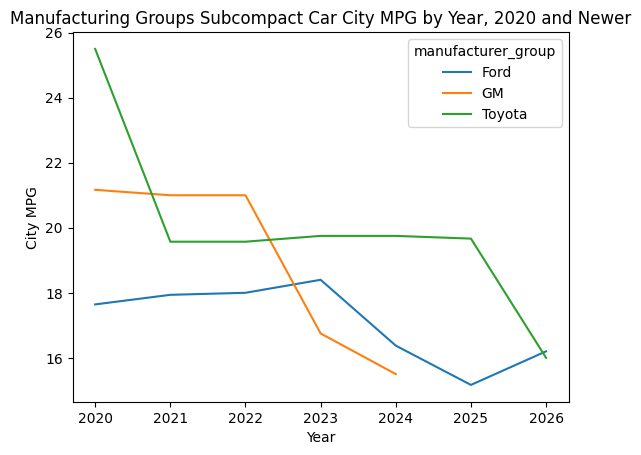

In [26]:
#Display the City MPG each manufacturing group has averaged each year
subcompact_recent_df = subcompact_df[subcompact_df['year'] >= 2020]

sns.lineplot(x='year', y='city_MPG', hue='manufacturer_group', data=subcompact_recent_df, errorbar=None)
plt.title('Manufacturing Groups Subcompact Car City MPG by Year, 2020 and Newer')
plt.xlabel("Year")
plt.ylabel("City MPG")
plt.show()

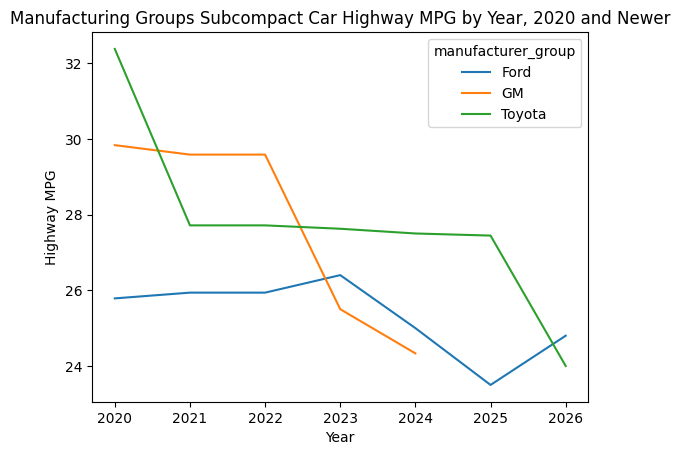

In [23]:
#Display the City MPG each manufacturing group has averaged each year
sns.lineplot(x='year', y='highway_MPG', hue='manufacturer_group', data=subcompact_recent_df, errorbar=None)
plt.title('Manufacturing Groups Subcompact Car Highway MPG by Year, 2020 and Newer')
plt.xlabel("Year")
plt.ylabel("Highway MPG")
plt.show()


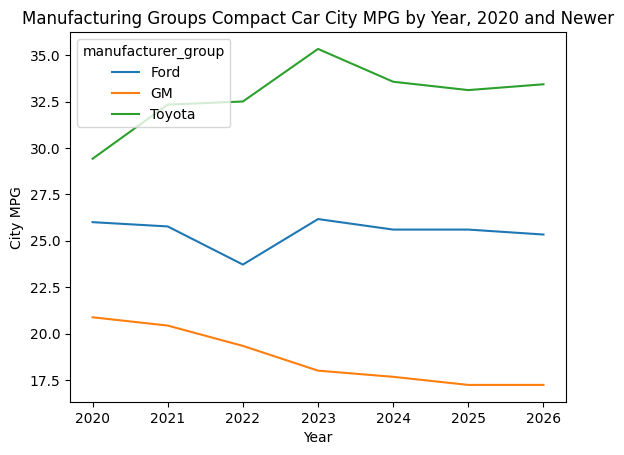

In [25]:
#Display the City MPG each manufacturing group has averaged each year
compact_recent_df = compact_df[compact_df['year'] >= 2020]
sns.lineplot(x='year', y='city_MPG', hue='manufacturer_group', data=compact_recent_df, errorbar=None)
plt.title('Manufacturing Groups Compact Car City MPG by Year, 2020 and Newer')
plt.xlabel("Year")
plt.ylabel("City MPG")
plt.show()

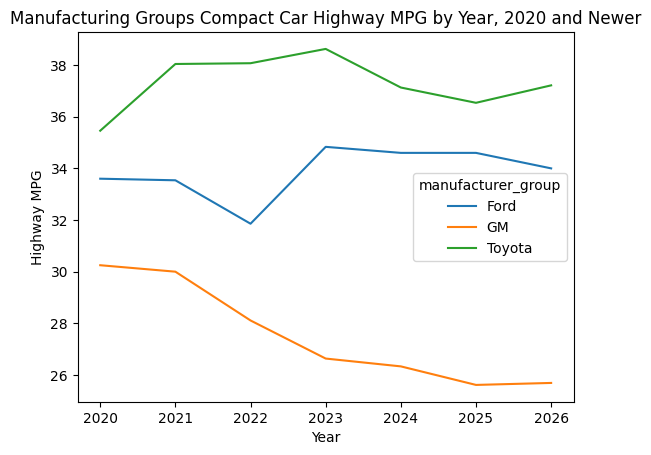

In [27]:
#Display the highway MPG each manufacturing group has averaged each year
sns.lineplot(x='year', y='highway_MPG', hue='manufacturer_group', data=compact_recent_df, errorbar=None)
plt.title('Manufacturing Groups Compact Car Highway MPG by Year, 2020 and Newer')
plt.xlabel("Year")
plt.ylabel("Highway MPG")
plt.show()

Only two groups have manufactured minivans since 2020: Toyota and MOPAR.

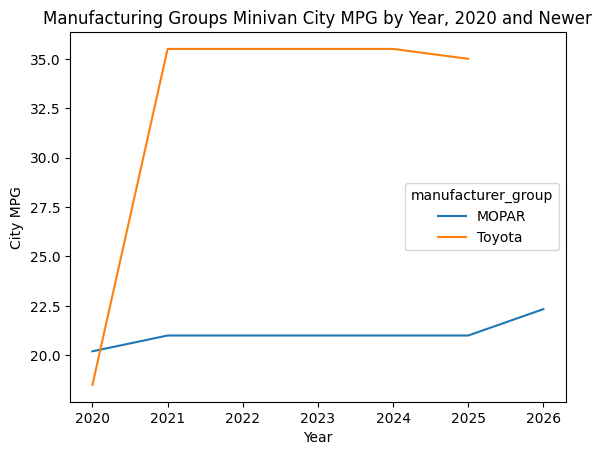

In [16]:
#Display the City MPG each manufacturing group has averaged each year
minivan_recent_df = minivan_df[minivan_df['year'] >= 2020]
sns.lineplot(x='year', y='city_MPG', hue='manufacturer_group', data=minivan_recent_df, errorbar=None)
plt.title('Manufacturing Groups Minivan City MPG by Year, 2020 and Newer')
plt.xlabel("Year")
plt.ylabel("City MPG")
plt.show()

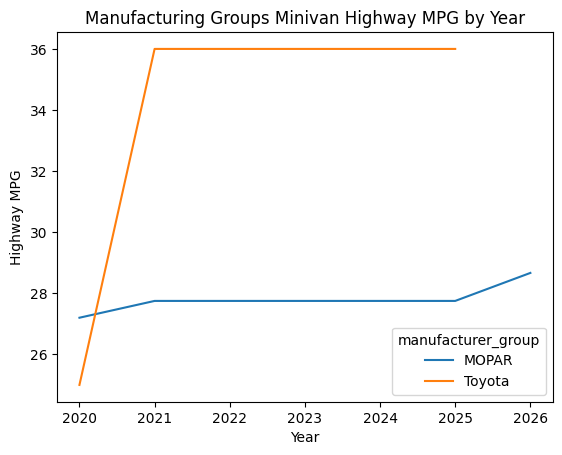

In [17]:
#Display the City MPG each manufacturing group has averaged each year
sns.lineplot(x='year', y='highway_MPG', hue='manufacturer_group', data=minivan_recent_df, errorbar=None)
plt.title('Manufacturing Groups Minivan Highway MPG by Year')
plt.xlabel("Year")
plt.ylabel("Highway MPG")
plt.show()

SUVs offer a lot of choice as they're manufactured by all the major manufacturing groups.

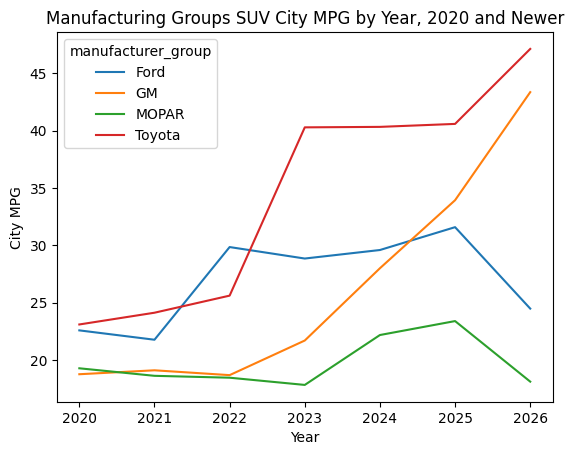

In [18]:
#Display the City MPG each manufacturing group has averaged each year
SUV_recent_df = SUV_df[SUV_df['year'] >= 2020]
sns.lineplot(x='year', y='city_MPG', hue='manufacturer_group', data=SUV_recent_df, errorbar=None)
plt.title('Manufacturing Groups SUV City MPG by Year, 2020 and Newer')
plt.xlabel("Year")
plt.ylabel("City MPG")
plt.show()

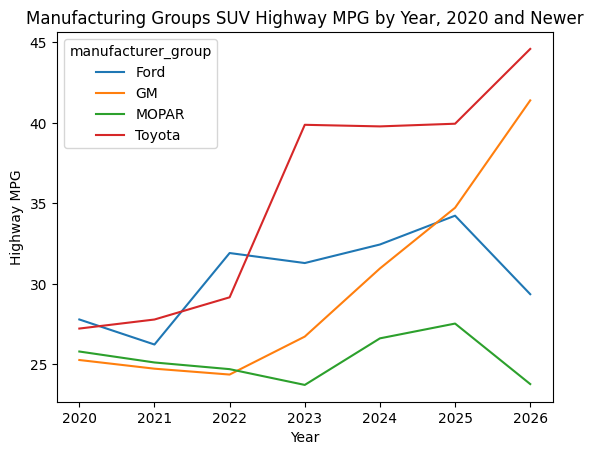

In [19]:
#Display the Highway MPG each manufacturing group has averaged each year
sns.lineplot(x='year', y='highway_MPG', hue='manufacturer_group', data=SUV_recent_df, errorbar=None)
plt.title('Manufacturing Groups SUV Highway MPG by Year, 2020 and Newer')
plt.xlabel("Year")
plt.ylabel("Highway MPG")
plt.show()

Fuel types are also a large choice in determining the vehicle for purchase these days. Fuels can be expensive, inexpensive, environmentally-friendly or otherwise. Regular, Premium, and Midgrade gasoline are all choices; as is hydrogen, hybrid (gas and electricity), electric, ethanol-blended flex fuel (E-85 or regular), and even diesel.

/tmp/ipython-input-1811362555.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")


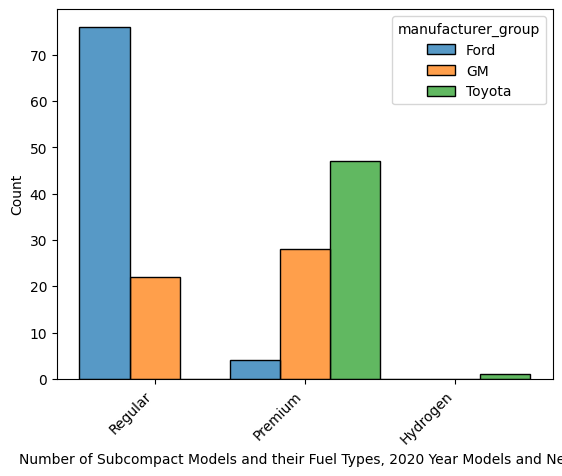

In [28]:
#Show the number of fuel types used by each manufacturer
ax = sns.histplot(data=subcompact_recent_df, x="fuelType",hue='manufacturer_group',  multiple='dodge', binwidth=100)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
plt.xlabel('Number of Subcompact Models and their Fuel Types, 2020 Year Models and Newer')
plt.show()

/tmp/ipython-input-3140189627.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")


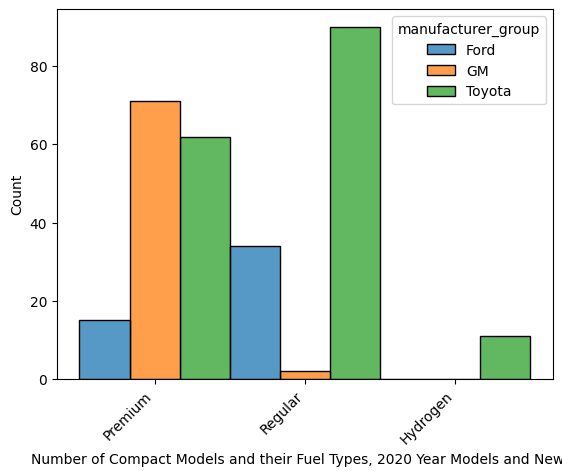

In [29]:
#Show the number of fuel types used by each manufacturer
ax = sns.histplot(data=compact_recent_df, x="fuelType",hue='manufacturer_group',  multiple='dodge', binwidth=100)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
plt.xlabel('Number of Compact Models and their Fuel Types, 2020 Year Models and Newer')
plt.show()

/tmp/ipython-input-215886306.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")


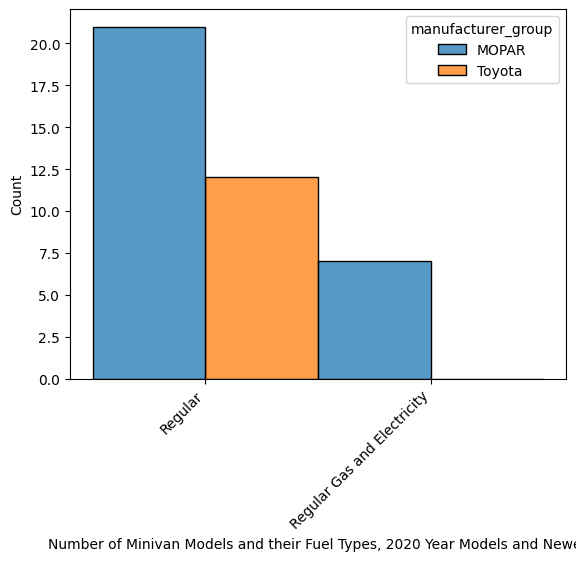

In [20]:
#Show the number of fuel types used by each manufacturer
ax = sns.histplot(data=minivan_recent_df, x="fuelType",hue='manufacturer_group',  multiple='dodge', binwidth=100)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
plt.xlabel('Number of Minivan Models and their Fuel Types, 2020 Year Models and Newer')
plt.show()

/tmp/ipython-input-1664398360.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")


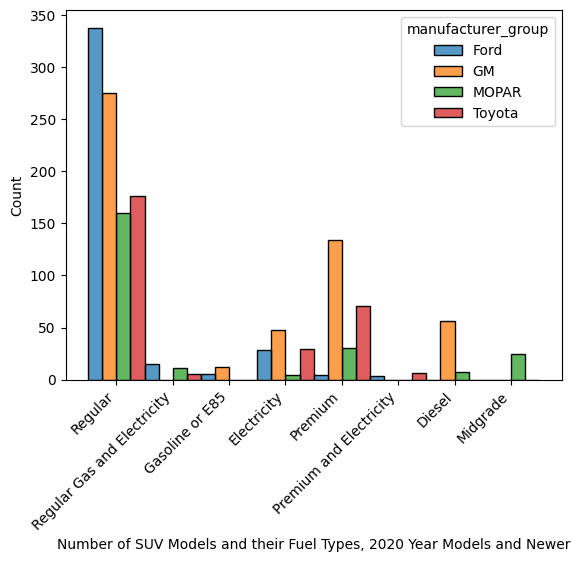

In [21]:
#Show the number of fuel types used by each manufacturer
ax = sns.histplot(data=SUV_recent_df, x="fuelType",hue='manufacturer_group',  multiple='dodge', binwidth=100)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
plt.xlabel('Number of SUV Models and their Fuel Types, 2020 Year Models and Newer')
plt.show()